# 2018-10-02 - Scraping, récupérer une image depuis LeMonde

Le notebook suivant récupère le contenu d'une page du journal [Le Monde](https://www.lemonde.f), extrait les urls d'images à l'aide d'une expression régulière puis télécharge les images pour les stocker dans un répertoire. Le notebook extrait les images du chanteur compositeur Aznavour, il faudra sans doute changer de thème et d'expression régulière.

Première étape, on récupère automatiquement le contenu d'une page.

In [1]:
import urllib.request as ulib

def get_html(source):
    with ulib.urlopen(source) as u:
        return u.read()

page = get_html("https://www.lemonde.fr")
page[:500]

b'<!doctype html>\n<!--[if lt IE 9]><html class="ie"><![endif]-->\n<!--[if IE 9]><html class="ie9"><![endif]-->\n<!--[if gte IE 9]><!-->\n<html lang="fr">\n<!--<![endif]-->\n\n<head>\n<script type="text/javascript">\nvar kameleoonLoadingTimeout = 1000;\nvar kameleoonStartLoadTime = new Date().getTime();\nif (!document.getElementById("kameleoonLoadingStyleSheet") && !window.kameleoonDisplayPageTimeOut) {\n    var kameleoonS = document.getElementsByTagName("script")[0];\n    var kameleoonCc = "* { visibility: hi'

Quelques expériences avec les encoding. La norme sur internet est l'encoding [utf-8](https://fr.wikipedia.org/wiki/UTF-8). Un caractère ne peut représenter que 255 caractères distincts ce qui est insuffisant pour certaines langues. L'encoding est un ensemble de codes qui permettent de représenter des caractères complexes avec une séquence d'octets.

In [2]:
ch = "é"
ch

'é'

In [3]:
ch.encode("utf-8")

b'\xc3\xa9'

Quand on essaye d'encoder et décoder avec des encodings différents, cela a peu de chance de fonctionner.

In [4]:
try:
    ch.encode("utf-8").decode("ascii")
except UnicodeDecodeError as e:
    print(e)

'ascii' codec can't decode byte 0xc3 in position 0: ordinal not in range(128)


On revient sur la page du monde.

In [5]:
page2 = page.decode("utf-8")

In [6]:
page2[:500]

'<!doctype html>\n<!--[if lt IE 9]><html class="ie"><![endif]-->\n<!--[if IE 9]><html class="ie9"><![endif]-->\n<!--[if gte IE 9]><!-->\n<html lang="fr">\n<!--<![endif]-->\n\n<head>\n<script type="text/javascript">\nvar kameleoonLoadingTimeout = 1000;\nvar kameleoonStartLoadTime = new Date().getTime();\nif (!document.getElementById("kameleoonLoadingStyleSheet") && !window.kameleoonDisplayPageTimeOut) {\n    var kameleoonS = document.getElementsByTagName("script")[0];\n    var kameleoonCc = "* { visibility: hi'

In [7]:
len(page)

379597

On cherche les urls d'images [JPEG](https://fr.wikipedia.org/wiki/JPEG), quelque chose comme ``<img ... src="...jpg" ... />``.

In [8]:
import re
reg = re.compile('src="(.*?[.]jpg)"')

In [9]:
images = reg.findall(page2)
images[:5]

['https://img.lemde.fr/2018/10/05/0/0/2400/1200/644/322/60/0/ba31f26_s2FHNLKOu0CwKjbyvKwQOpaq.jpg',
 'https://img.lemde.fr/2018/10/03/36/15/3143/1571/312/156/60/0/46d7ef5_5468153-01-06.jpg',
 'https://img.lemde.fr/2018/10/05/687/0/5472/2733/312/156/60/0/cdfec58_5483202-01-06.jpg',
 'https://img.lemde.fr/2018/10/05/368/0/4400/2200/312/156/60/0/ba014cf_NIrNCb45cwtoZFgdUFmmCKcT.jpg',
 'https://img.lemde.fr/2018/10/05/0/0/5364/2682/312/156/60/0/ee3677d_xTROlaJfXPIwVqOYc0L9lNl_.jpg']

In [10]:
import os
if not os.path.exists("images/lemonde2"):
    os.makedirs("images/lemonde2")

Et on enregistre les images.

In [11]:
for img in images:
    nom = img.split("/")[-1]
    dest = os.path.join("images/lemonde2", nom)
    if os.path.exists(dest):
        continue
    
    try:
        contenu = get_html(img)
    except Exception as e:
        print(e)
        continue
    print(nom)
    with open(dest, "wb") as f:
        f.write(contenu)

46d7ef5_5468153-01-06.jpg
9e3f7e2_5477956-01-07.jpg
e664a7f_27027-kbymss.kf2tp.jpg
f84a31fb-25b2-4a9e-8699-1817bb3e75bf2x.jpg
f84a31fb-25b2-4a9e-8699-1817bb3e75bf.jpg
b5e69199-6940-42e8-9b5b-5ed6136c21a02x.jpg
b5e69199-6940-42e8-9b5b-5ed6136c21a0.jpg
b46d96bc-c2d8-4a08-90b8-f6a1e6600c552x.jpg
b46d96bc-c2d8-4a08-90b8-f6a1e6600c55.jpg
unknown url type: '//s1.lemde.fr/mmpub/img/widget/58b99a93e340f1.60049318/cf1e36d19f3444af8f937f513348998d.jpg'
eyJ1cmwiOiJodHRwczpcL1wvcGhvdG8yLmxhY2VudHJhbGUuZnJcL3Bob3RvXC9sY1wvVzFcLzAxXC8xOVwvVzEwMTE5MjA2MS5qcGciLCJtYXhXaWR0aCI6MTkwLCJtYXhIZWlnaHQiOjEyMH0-.jpg
86e5a51_5477127-01-06.jpg
46ef44b_13593-1a2xyan.y9ns.jpg
c65eac8_5112465-01-06.jpg
ill_4612707_d097_000_par8124986.jpg
eyJ1cmwiOiJodHRwczpcL1wvcGhvdG8yLmxhY2VudHJhbGUuZnJcL3Bob3RvXC9sY1wvRTFcLzAzXC8yNVwvRTEwMzI1ODQ5MC5qcGciLCJtYXhXaWR0aCI6MTkwLCJtYXhIZWlnaHQiOjEyMH0-.jpg
eyJ1cmwiOiJodHRwczpcL1wvcGhvdG8yLmxhY2VudHJhbGUuZnJcL3Bob3RvXC9sY1wvRTFcLzAzXC8yMlwvRTEwMzIyNDgzNy5qcGciLCJtYXhXaWR0aCI6MTkwLCJt

Affichons quelques images.

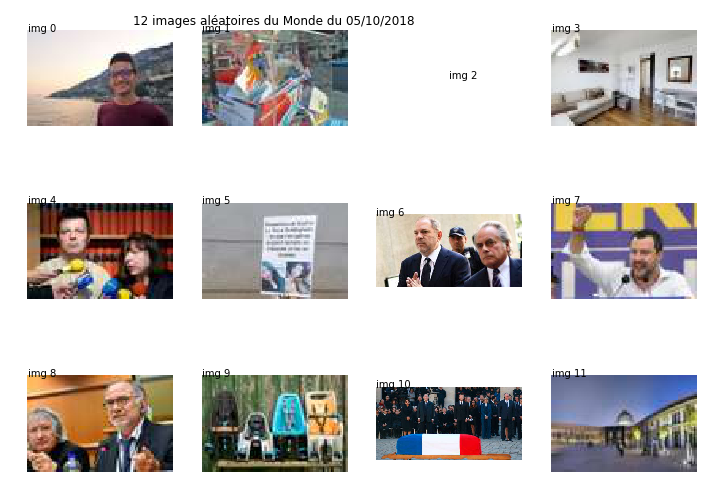

In [12]:
from mlinsights.plotting import plot_gallery_images
import numpy
from datetime import datetime
now = datetime.now().strftime("%d/%m/%Y")
fold = "images/lemonde2"
imgs = [os.path.join(fold, img) for img in os.listdir(fold)]
choices = numpy.random.choice(len(imgs), 12)
random_set = [imgs[i] for i in choices]
ax = plot_gallery_images(random_set)
ax[0, 1].set_title("12 images aléatoires du Monde du %s" % now);

On se concentre sur les images d'Aznavour en utilisant la légende de l'image.

In [13]:
import re
reg = re.compile('<img.*?src="(.*?[.]jpg)".*?alt="(.*?znavour.*?)".*?>')

In [14]:
reg.findall(page2)

[('https://img.lemde.fr/2018/10/01/42/0/1920/959/312/156/60/0/be49a81_x8_FYiGpFBZsgBYxNo_UAZg7.jpg',
  'Dr Dre et Charles Aznavour.')]

In [15]:
if not os.path.exists("images/aznavour"):
    os.makedirs("images/aznavour")

In [16]:
azna = reg.findall(page2)

In [17]:
with open(os.path.join("images/aznavour", "legend.txt"), "w") as fl:

    for img, alt in azna:
        nom = img.split("/")[-1]
        dest = os.path.join("images/aznavour", nom)
        if os.path.exists(dest):
            continue

        try:
            contenu = get_html(img)
        except Exception as e:
            print(e)
            continue
        print(nom)
        with open(dest, "wb") as f:
            f.write(contenu)
        fl.write("{0};{1}\n".format(nom, alt))

be49a81_x8_FYiGpFBZsgBYxNo_UAZg7.jpg


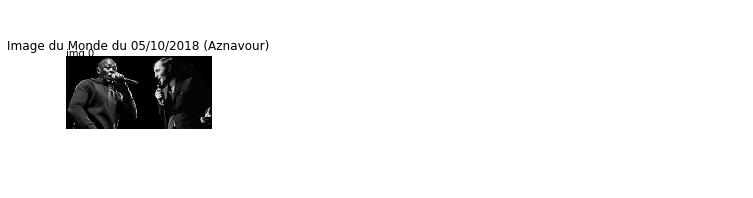

In [18]:
now = datetime.now().strftime("%d/%m/%Y")
fold = "images/aznavour"
imgs = [os.path.join(fold, img) for img in os.listdir(fold) if ".jpg" in img]
ax = plot_gallery_images(imgs)
ax[0].set_title("Image du Monde du %s (Aznavour)" % now);